In [2]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd



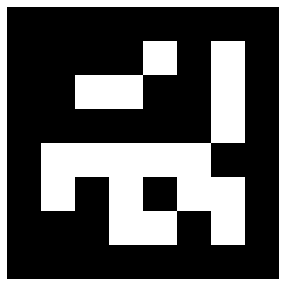

In [17]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

nx = 1
ny = 1
fig = plt.figure(figsize=(nx*5, ny*5))
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,2, 1000)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("data/markers_2.pdf")
plt.show()

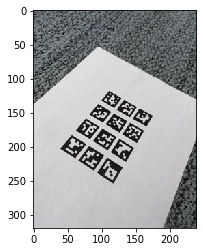

In [4]:
frame = cv2.imread("data/markers_photo.jpeg")
plt.figure()
plt.imshow(frame)
plt.show()

In [5]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners)

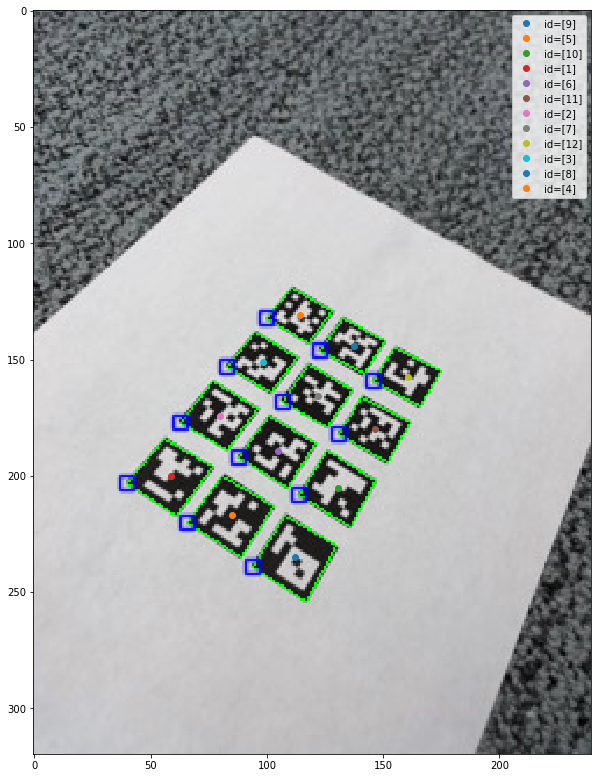

In [6]:
plt.figure(figsize=(10,15))
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

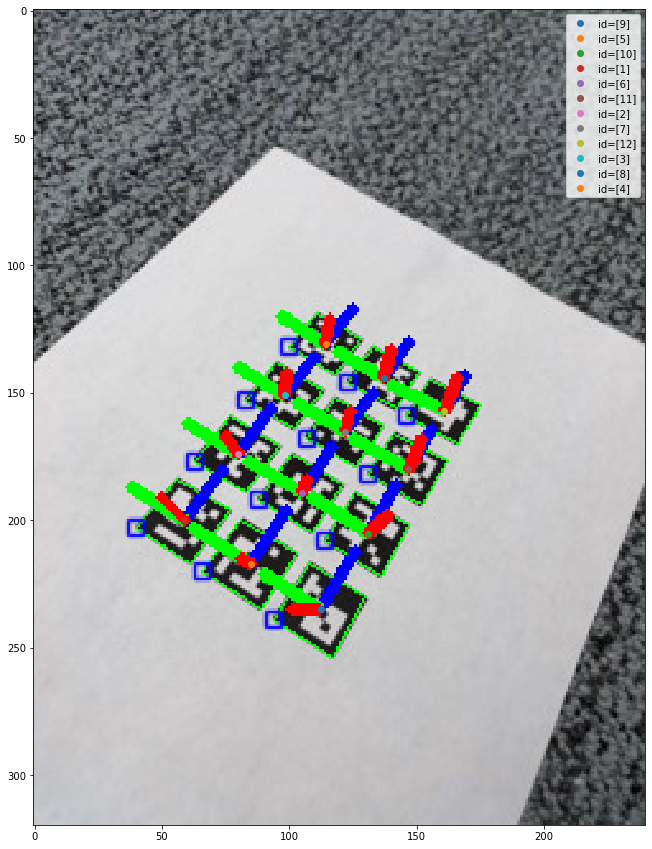

In [9]:

camera_intrinsics = np.array([[612.82019043,   0.        , 322.14050293],
                              [  0.        , 611.48303223, 247.9083252 ],
                              [  0.        ,   0.        ,   1.        ]])
distortion_coefficients = np.zeros((5))
for i in range(len(corners)):
    rvec, tvec, markerPoints = aruco.estimatePoseSingleMarkers(corners[i], 0.01,
                                                               camera_intrinsics,
                                                               np.zeros(5))
    if i == 0:
        frame_axis = aruco.drawAxis(frame_markers.copy(), camera_intrinsics, distortion_coefficients, rvec, tvec, 0.01)
    else:
        frame_axis = aruco.drawAxis(frame_axis.copy(), camera_intrinsics, distortion_coefficients, rvec, tvec, 0.01)

plt.figure(figsize=(15,15))
plt.imshow(frame_axis)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()